In [3]:
# import necessary modules

import numpy as np
import nltk
import scipy.stats as ss
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [33]:
# import Gutenberg Project and select 'bryant-stories.txt' classic

from nltk.corpus import gutenberg
gutenberg.fileids()
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', ...]
# select text - Stories to Tell to Children by Sara Cone Bryant 1918 - and break text into words and store into bryant array
bryant = gutenberg.words('bryant-stories.txt')
len(bryant) # the number of words in the text

55563

In [34]:
all_words = list(map(str.lower, bryant)) # lowering words
unique_words = set(all_words) # listing unique words
counts = [(w, all_words.count(w)) for w in unique_words] # tuple of words and its counts

counts[:5]

[('peeped', 2), ('emperors', 1), ('hopped', 3), ('door', 52), ('chickens', 3)]

In [35]:
# managing frequency dictionary for wordcloud
freq_dict = {}
for w, c in counts:
  freq_dict[w] = c

In [36]:
# assign rank to words using scipy.stats.rankdata according to their count and sort the list according to rank
count_rank = ss.rankdata([c for (w, c) in counts]) 
counts_ranked = [(c[0], c[1], w) for c, w in zip(counts, count_rank)] # merging word, count and rank into a list
print(counts_ranked[0:10])
counts_sorted = sorted(counts_ranked, key=lambda _: _[2]) # sorting by rank
"""
Once words are sorted according to the rank we can actually see that 
the most frequently used words are like 'her', 'it', 'of', 'the' etc.
"""
counts_sorted[-10:]

[('peeped', 2, 1982.0), ('emperors', 1, 831.0), ('hopped', 3, 2464.0), ('door', 52, 3802.0), ('chickens', 3, 2464.0), ('repent', 2, 1982.0), ('arrived', 2, 1982.0), ('astonishment', 1, 831.0), ('thick', 3, 2464.0), ('gardeners', 1, 831.0)]


[('was', 713, 3931.0),
 ('of', 818, 3932.0),
 ('"', 900, 3933.0),
 ('he', 1017, 3934.0),
 ('a', 1036, 3935.0),
 ('to', 1180, 3936.0),
 ('.', 1817, 3937.0),
 ('and', 2098, 3938.0),
 ('the', 3451, 3939.0),
 (',', 3481, 3940.0)]

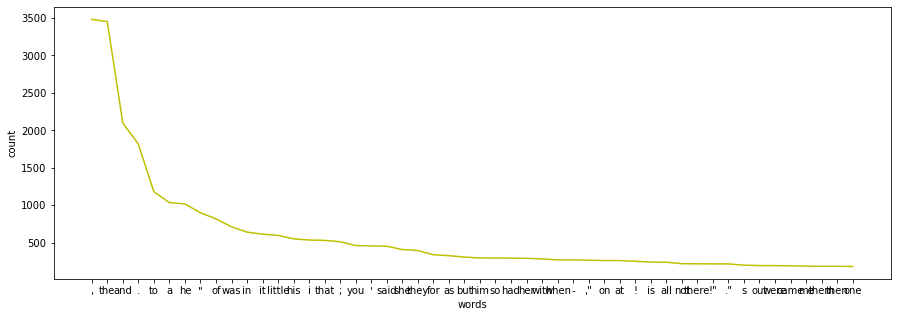

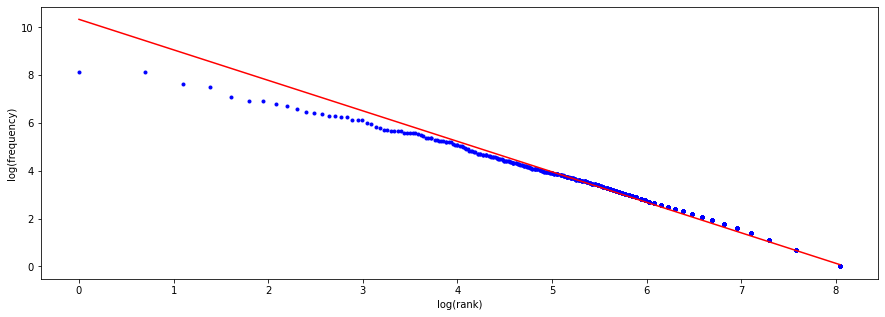

Slope: -1.2763345325123845
Intercept: 10.340753635581628


Text(0, 0.5, 'frequency')

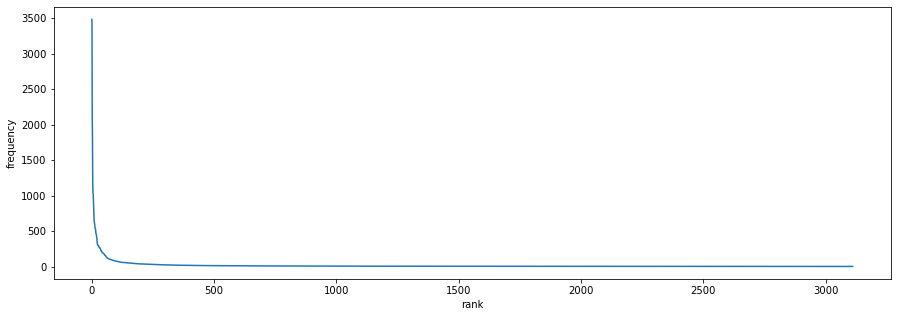

In [63]:
# Plot the graphs

# graph of first fifty most frequently appearing words
plt.rcParams['figure.figsize'] = [15, 5]
X = np.array([w for (w, c, r) in list(reversed(counts_sorted[-50:]))])
Y = np.array([c for (w, c, r) in list(reversed(counts_sorted[-50:]))])
plt.plot(X, Y, 'y')
plt.xlabel('words')
plt.ylabel('count')
plt.show()

# log(rank) vs log(frequency) graph
L = len(counts_sorted)
X = np.array([np.log(L-r+1) for (w, c, r) in counts_sorted])
Y = np.array([np.log(c) for (w, c, r) in counts_sorted])
plt.plot(X, Y, 'b.')
A = np.vstack([X, np.ones(L)]).T
m, c = np.linalg.lstsq(A, Y, rcond=None)[0]
plt.plot(X, m*X + c, 'r')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.show()
slope_intercept = np.polyfit(X,m*X+c,1)
print(f'Slope: {slope_intercept[0]}\nIntercept: {slope_intercept[1]}')

# rank vs frequency graph
plt.plot([L-r+1 for (_, __, r) in counts_sorted], [c for (_, c, __) in counts_sorted])
plt.xlabel('rank')
plt.ylabel('frequency')

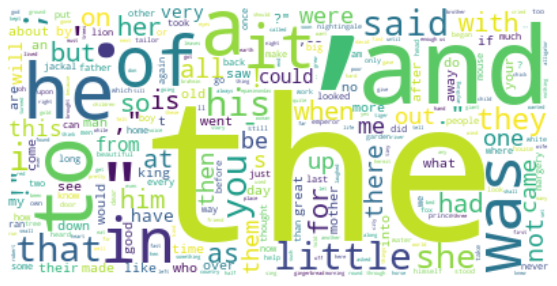

In [51]:
# Generate Word Cloud
wc = WordCloud(background_color="white", max_words=1000)
# generate word cloud
wc.generate_from_frequencies(freq_dict)
# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
# this word cloud contains stopwords

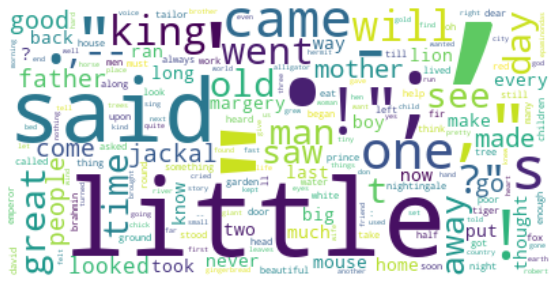

In [52]:
stopwords = set(STOPWORDS)
# create frequency dictionary by removing stopwords
freq_dict_ = {}
for w, c in counts:
  if w not in stopwords:
    freq_dict_[w] = c

wc = WordCloud(background_color="white")
# generate word cloud
wc.generate_from_frequencies(freq_dict_)
# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

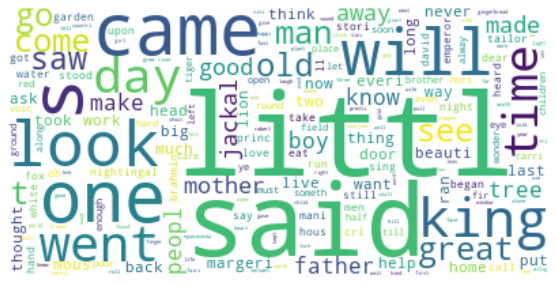

In [53]:
# function to remove symbols from the text
def remove_symbols(line):
    return re.sub('[^A-Za-z0-9\s]+', '', line).lower()

# performing stemming of the words
stopwords = set(STOPWORDS)
freq_dict_ = {}
for w, c in counts:
  if w not in stopwords:
    w = remove_symbols(w)
    if w:
      w = porter.stem(w)
      freq_dict_[w] = freq_dict_.get(w, 0) + c

wc = WordCloud(background_color="white")
# generate word cloud
wc.generate_from_frequencies(freq_dict_)
# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()